In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud
import nltk 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_trump = pd.read_csv('drive/My Drive/Colab Notebooks/hashtag_donaldtrump.csv', lineterminator='\n')
df_biden = pd.read_csv('drive/My Drive/Colab Notebooks/hashtag_joebiden.csv', lineterminator='\n')

In [ ]:
df_trump.drop(['created_at', 'tweet_id', 'user_id', 'user_name', 'user_screen_name',
               'user_description', 'user_join_date', 'user_followers_count', 'collected_at'], axis=1, inplace=True)
df_biden.drop(['created_at', 'tweet_id', 'user_id', 'user_name', 'user_screen_name',
               'user_description', 'user_join_date', 'user_followers_count', 'collected_at'], axis=1, inplace=True)

df_trump['country'].replace({"United States of America": "United States"}, inplace=True)
df_biden['country'].replace({"United States of America": "United States"}, inplace=True)

In [ ]:
df_trump.dropna(inplace=True)
df_biden.dropna(inplace=True)

In [ ]:
df_trump.loc[:,'candidate'] = 'Trump'
df_biden.loc[:, 'candidate'] = 'Biden'

df_tweets = pd.concat([df_trump, df_biden])

In [ ]:
df_tweets

,tweet,likes,retweet_count,source,user_location,lat,long,city,country,continent,state,state_code,candidate
2,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,Trump
4,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,Trump
11,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,Trump
12,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,Trump
13,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776861,#election #2020Elections #trump #biden https:/...,0.0,0.0,Twitter for iPhone,"New York, USA",40.712728,-74.006015,New York,United States,North America,New York,NY,Biden
776865,@FLOTUS I’m excited to have a FLOTUS whose vag...,0.0,0.0,Twitter for iPhone,"Washington, DC",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,Biden
776869,No puede ser lo #Panazis como siempre sacando ...,0.0,0.0,Twitter for iPhone,"Tijuana, Baja California",32.501019,-116.964663,Tijuana,Mexico,North America,Baja California,BCN,Biden
776876,"Mr. #Biden, tear down that wall (with #Mexico)...",1.0,0.0,Twitter for iPhone,"Auckland, NZ",-36.852095,174.763180,Auckland,New Zealand,Oceania,Auckland,AUK,Biden


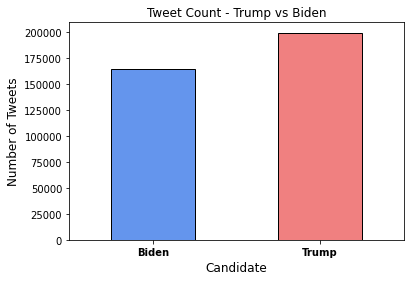

In [ ]:
df_tweets.groupby(['candidate']).count().tweet.plot(kind='bar', title='Tweet Count - Trump vs Biden', 
                                                    edgecolor='black', color=['cornflowerblue', 'lightcoral'])
plt.xticks(rotation=0, weight='bold')
plt.xlabel('Candidate', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12);

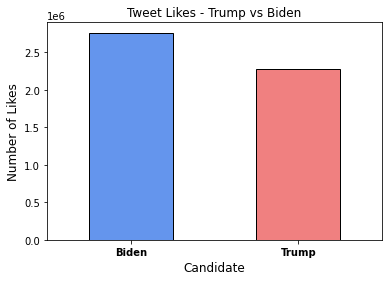

In [ ]:
df_tweets.groupby(['candidate']).sum().likes.plot(kind='bar', title='Tweet Likes - Trump vs Biden',
                                                  edgecolor='black', color=['cornflowerblue', 'lightcoral'])
plt.xticks(rotation=0, weight='bold')
plt.xlabel('Candidate', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12);

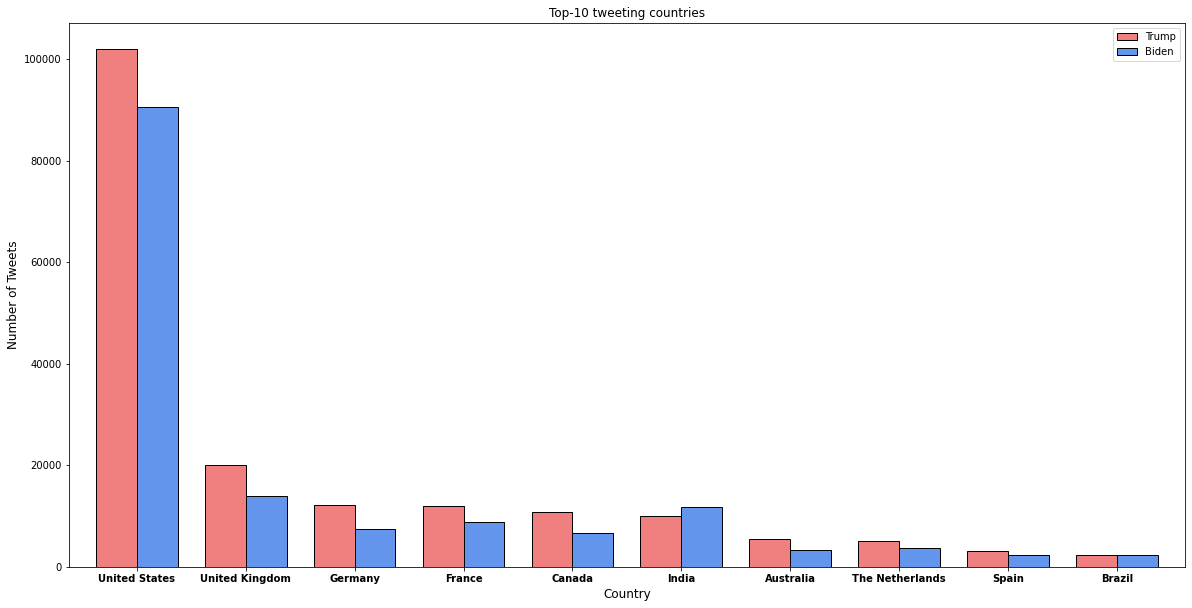

In [ ]:
trump_tweets = df_trump.groupby(['country']).count().tweet.sort_values(ascending=False)[:10]
biden_tweets = df_biden.groupby(['country']).count().tweet.sort_values(ascending=False)[:10]

combined_tweets_by_country = pd.merge(trump_tweets,biden_tweets,on='country')
combined_tweets_by_country.rename(columns={'tweet_x': 'Trump', 'tweet_y': 'Biden'},inplace=True)

combined_tweets_by_country.plot(kind='bar',title='Top-10 tweeting countries', figsize=(20,10), width = 0.75,
                                edgecolor='black', color=['lightcoral', 'cornflowerblue'])
plt.xticks(rotation=0, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12);

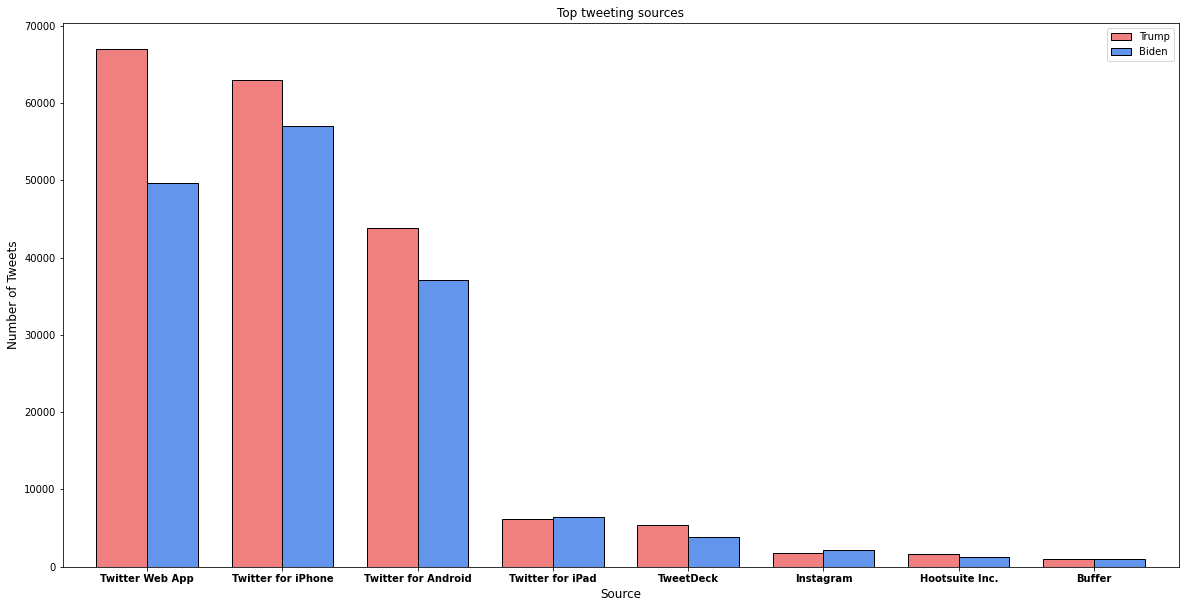

In [ ]:
trump_tweets = df_trump.groupby(['source']).count().tweet.sort_values(ascending=False)[:10]
biden_tweets = df_biden.groupby(['source']).count().tweet.sort_values(ascending=False)[:10]

combined_tweets_by_source = pd.merge(trump_tweets,biden_tweets,on='source')
combined_tweets_by_source.rename(columns={'tweet_x': 'Trump', 'tweet_y': 'Biden'},inplace=True)

combined_tweets_by_source.plot(kind='bar',title='Top tweeting sources', figsize=(20,10), width = 0.75,
                               edgecolor='black', color=['lightcoral', 'cornflowerblue'])
plt.xticks(rotation=0, weight='bold')
plt.xlabel('Source', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12);

In [ ]:
lmtzr = WordNetLemmatizer()
stop_words = stopwords.words('english')
def clean_tweet(tweet):
  cleaned_tweet = []
  tweet = re.sub("\d+|http?\S+|[^A-Za-z0-9]+", " ", tweet.lower())
  tweet_words = word_tokenize(tweet)
  
  for word in tweet_words:
    if word not in stop_words:
      cleaned_tweet.append(lmtzr.lemmatize(word))

  return cleaned_tweet

In [ ]:
df_trump['tweet'] = df_trump['tweet'].apply(lambda x: clean_tweet(x))
df_biden['tweet'] = df_biden['tweet'].apply(lambda x: clean_tweet(x))

In [ ]:
df_trump[['tweet']].head()

,tweet
2,"[trump, student, used, hear, year, ten, year, ..."
4,"[get, tie, get, tie, trump, rally, iowa]"
11,"[nypost, censorship, censored, twitter, manipu..."
12,"[trump, presidenttrump, trump, landslidevictor..."
13,"[susan, hutch, joebiden, ukraine, realdonaldtr..."


In [ ]:
df_biden[['tweet']].head()

,tweet
6,"[nypost, censorship, censored, twitter, manipu..."
17,"[comment, democrat, understand, ruthless, chin..."
22,"[twitter, everything, help, democrat, win, ele..."
25,"[realjameswoods, bidencrimefamily, joebiden, h..."
28,"[trump, obama, clinton, biden, manwomanpersonc..."


In [ ]:
def create_wordcloud(text):
  mask = np.array(Image.open('drive/My Drive/Colab Notebooks/Cloud.png'))
  wc = WordCloud(background_color='white',mask=mask,max_words=500,repeat=True)
  wc.generate(str(text))

  %matplotlib inline
  plt.figure(1,figsize=(13, 13))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

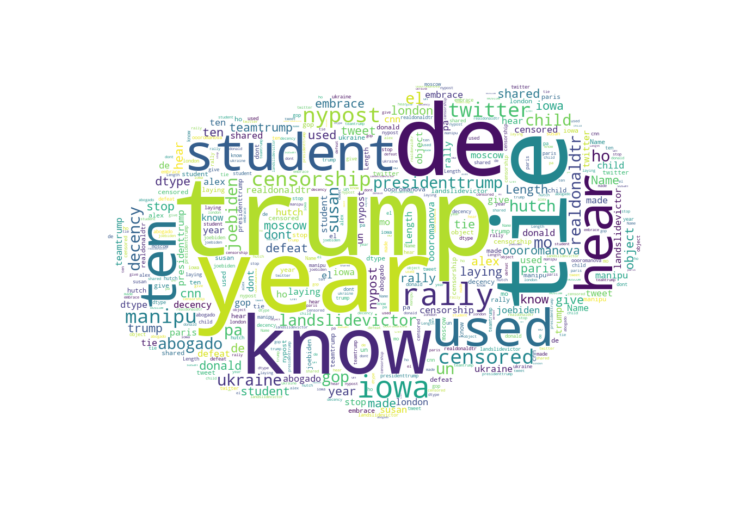

In [ ]:
create_wordcloud(df_trump['tweet'])

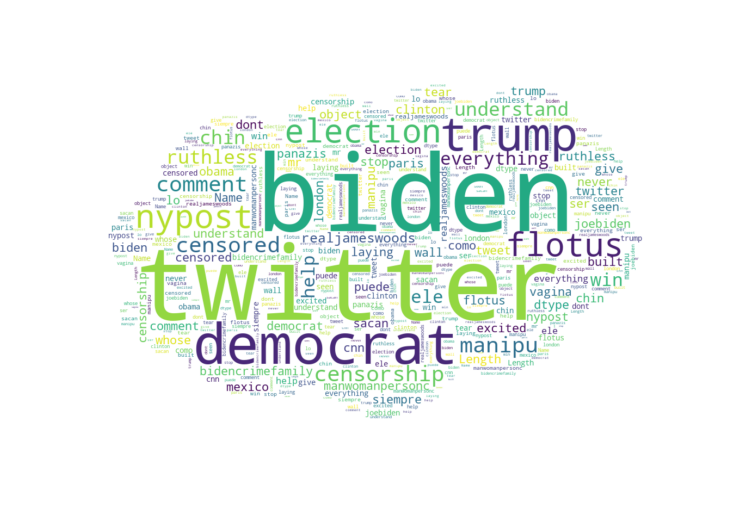

In [ ]:
create_wordcloud(df_biden['tweet'])

In [ ]:
def sentiment_analysis(df):
  df['polarity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
  df['subjectivity'] = df['tweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)
    
  df.loc[df.polarity > 0,'sentiment'] = 'positive'
  df.loc[df.polarity == 0,'sentiment'] = 'neutral'
  df.loc[df.polarity < 0,'sentiment'] = 'negative'
    
  return df[['tweet','polarity','subjectivity','sentiment']].head()

In [ ]:
sentiment_analysis(df_trump)

,tweet,polarity,subjectivity,sentiment
2,"[trump, student, used, hear, year, ten, year, ...",0.333333,0.333333,positive
4,"[get, tie, get, tie, trump, rally, iowa]",0.000000,0.000000,neutral
11,"[nypost, censorship, censored, twitter, manipu...",-0.148810,0.678571,negative
12,"[trump, presidenttrump, trump, landslidevictor...",0.500000,0.750000,positive
13,"[susan, hutch, joebiden, ukraine, realdonaldtr...",0.000000,0.000000,neutral


In [ ]:
sentiment_analysis(df_biden)

,tweet,polarity,subjectivity,sentiment
6,"[nypost, censorship, censored, twitter, manipu...",-0.14881,0.678571,negative
17,"[comment, democrat, understand, ruthless, chin...",-1.00000,1.000000,negative
22,"[twitter, everything, help, democrat, win, ele...",0.17500,0.522222,positive
25,"[realjameswoods, bidencrimefamily, joebiden, h...",0.00000,0.000000,neutral
28,"[trump, obama, clinton, biden, manwomanpersonc...",0.00000,0.000000,neutral


In [ ]:
def plot_sentiment(df):
  count = df.loc[:,'sentiment'].value_counts()
  percentage = round(df.loc[:, 'sentiment'].value_counts(normalize=True)*100, 2)

  df_temp = pd.concat([count, percentage], axis=1, keys=['count', 'percentage'])

  my_circle = plt.Circle((0,0), 0.7, color='white')
  plt.pie(df_temp.percentage, labels=df_temp.index, autopct='%1.1f%%', colors=['skyblue', 'limegreen', 'orangered'], startangle=90, pctdistance=0.5)
  p=plt.gcf()
  p.gca().add_artist(my_circle)
  plt.show()

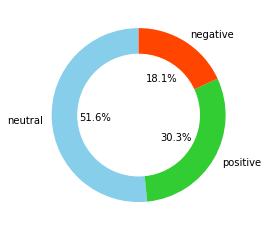

In [ ]:
plot_sentiment(df_trump)

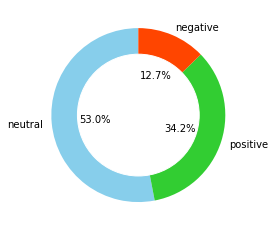

In [ ]:
plot_sentiment(df_biden)